In [1]:
import os, shutil
folders = os.listdir("Images")

In [2]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs", "cats", "horses", "humans"]

In [3]:
for c in classes:
    p = os.path.join("val_images", c)
    if not os.path.isdir(p):
        os.mkdir(p)
SPLIT = 0.9
for f in os.listdir("Images"):
    path = "Images/"+f
    imgs = os.listdir(path)

    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    for img_f in files_to_move:
        src = os.path.join(path, img_f)
        dest = os.path.join('val_images/'+f, img_f)
        shutil.move(src, dest)

In [4]:
print("Training Data")
for f in folders:
    path = "Images/"+f
    print(f+" "+str(len(os.listdir(path))))

print("\n Validation Data")
for f in folders:
    path = "val_images/"+f
    print(f+" "+str(len(os.listdir(path))))

Training Data
cats 105
dogs 105
horses 105
humans 105

 Validation Data
cats 97
dogs 97
horses 97
humans 97


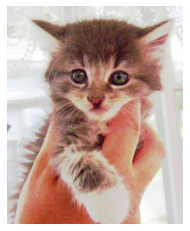

In [5]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

sample_path = "Images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

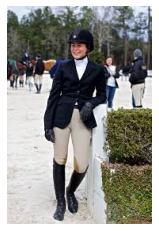

In [6]:
sample_path = "Images/humans/rider-103.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )

val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "Images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 420 images belonging to 4 classes.
Found 388 images belonging to 4 classes.


In [8]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 224, 224, 3)
(32, 4)


In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input,output=fc2)

model_new.summary()

from tensorflow.python.framework.ops import enable_eager_execution
enable_eager_execution()

TypeError: Cannot convert a symbolic Keras input/output to a numpy array. This error may indicate that you're trying to pass a symbolic value to a NumPy call, which is not supported. Or, you may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model.

In [ ]:
for ix in range(len(model_new.layers)):
    pass
    #print(ix,model_new.layers[ix])

for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.summary()

Error: Session cannot generate requests

In [28]:
# Train our model
from keras.optimizers import Adam
adam = Adam(lr=0.00003)
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


NameError: name 'model_new' is not defined

In [29]:
history = model_new.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 5,
    validation_data = val_generator,
    validation_steps = 4   
)

NameError: name 'model_new' is not defined

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

NameError: name 'history' is not defined

In [31]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

NameError: name 'acc' is not defined